## Title :
Bayes - Exercise 1

## Description :
Model y as normal distribution with unknown mean and std dev, ignoring x

- After completing this exercise you should see following trace plots: 

<img src="../fig/fig1.png" style="width: 500px;">


## Hints: 

<a href="https://docs.pymc.io/api/distributions/continuous.html#pymc3.distributions.continuous.Normal" target="_blank">pymc3 Normal</a>

Refer to lecture notebook.

Do not change any other code except the blanks.

In [1]:
import pandas as pd
import numpy as np

import pymc as pm
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot
%matplotlib inline

In [3]:
df = pd.read_csv('../data/data3.csv')
df.head()

,x,y
0,2.875775,0.223825
1,7.883051,6.118438
2,4.089769,2.167730
3,8.830174,5.868317
4,9.404673,7.333365


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, tau]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, tau]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2 seconds.


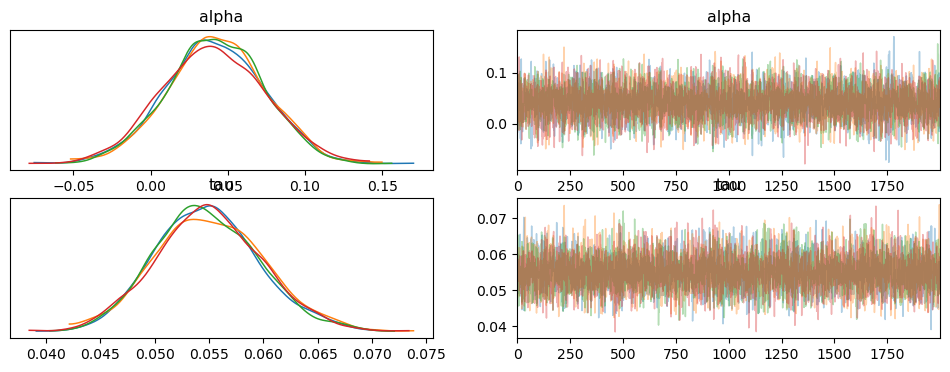

In [13]:
### edTest(test_pm_model) ###
np.random.seed(109)
with pm.Model() as model:
   #Set priors for unknown model parameters
   alpha = pm.Normal('alpha',mu=0,tau=1000)
   
   # Likelihood (sampling distribution) of observations
   tau_obs = pm.Gamma('tau', alpha=0.001, beta=0.001)
   obs = pm.Normal("y", mu = alpha, tau = tau_obs, observed=df["y"]) #Parameters to set: name, mu, tau, observed
   # create trace plots 
   trace1 = pm.sample(2000, tune=2000)
   trace2 = pm.sample(2000, tune=2000, return_inferencedata=False)
   pm.plot_trace(trace1, compact=False);


In [14]:
#posterior means
np.mean(trace2['alpha']) , np.mean(trace2['tau'])

(0.04270433060682264, 0.05484139715476188)